<a href="https://colab.research.google.com/github/btarakaratna/Retail-Sales-Analysis-Project/blob/main/Data_Storytelling_Analysing_Survival_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**End to End Exploratory Data Analysic (EDA) on the Titanic Dataset**

Why do we use EDA?
1. Understanding the Data
2.Data Cleaning
3. Feature Selction
4. Assumption Checking

Mainly used Libraries are :
1. Pandas
2. Seaborn

In [2]:
import sys
!{sys.executable} -m pip install numpy

In [3]:
import sys
!{sys.executable} -m pip install pandas

In [4]:
import sys
!{sys.executable} -m pip install matplotlib


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [6]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'
#git clones the repo to the local, after installing the data set we will be working on it

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.09 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [7]:
import pandas as pd
import numpy as np

In [8]:
# Load the dataset from a URL
titanic_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

# Displaying the first 5 rows
print("First 5 rows of the dataset:")
titanic_df.head()

First 5 rows of the dataset:


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
# Displaying the last 5 rows
titanic_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [10]:
#tells us the entire shape of the DataSet
titanic_df.shape

(891, 12)

In [11]:
#Summary:
print("Summary of the dataset:")
titanic_df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-- By the Info we get there are Missing Values: there are the Null Values in the Dataset, for whihc we should work on it mainly these three coloumns : Age , Cabin , Embarked

In [12]:
print("Describe Stats of the dataset:")
titanic_df.describe()

Describe Stats of the dataset:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

by the describe() interpretation we get:

Survived: Roughly 38.4% of the passengers made it through the disaster.

Age: Passenger ages span from about 5 months to 80 years, with the typical (average) age being close to 30.

Fare: Ticket prices show strong skewness—the average fare is around $32, but half of the passengers paid less than $14.45. Some individuals paid as much as $512, highlighting significant outliers.

Data Cleaning: to clean the data set mainly the Missing Values which are Null Values, Data Set is also bifurcated into :
--Numerical Data
--Categorical Data
--High Cardinality/Null Values

In [13]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [14]:
#Going through the Missing values before cleaning
#isna() going to check how many null values are present
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age has 177 Missing Null Values,
Cbain has 687 Missing Null Values,
Embarked has 2 Missing Values**

In [15]:
titanic_df.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [16]:
median = titanic_df['Age'].median()
print(median)

28.0


In [17]:
#Firstly we will deal with the Missing values of AGE, we will use the median to fill missing ages.
median_age = titanic_df['Age'].median()
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

In [18]:
# Verifying that there are no more missing null values for AGE
print("Missing values after Age cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())
#Here the null values of AGE is been filled with the Median Value that is 28.

Missing values after Age cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [19]:
mode = titanic_df['Embarked'].mode()
print(mode)
mode = titanic_df['Embarked'].mode([0])
print(mode)

0    S
Name: Embarked, dtype: object
0    S
Name: Embarked, dtype: object


In [20]:
#Secondly we will deal with the Missing values of EMBARKED, we will use the most common part of Embarkation.
most_common_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(most_common_embarked)

In [21]:
# Verifying that there are no more missing null values for EMBARKED
print("Missing values after Embarked cleaning:")
print(titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum())
#Here the null values of Embarked is been filled with 'S'.

Missing values after Embarked cleaning:
Age           0
Embarked      0
Cabin       687
dtype: int64


In [22]:
#At last we are dealing with the Missing values of Cabin.
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int) # 1 if has cabin, 0 if not basically it's TRU or FALSE
titanic_df.drop('Cabin', axis=1, inplace=True)

In [23]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Has_Cabin  
0      0         A/5 21171   7.2500        S          0  
1      0          PC 17599  71.2833        C          1  
2      0  STON/O2. 3101282   7.9250        S          0  
3      0            113803  53.1000        S          1  
4      0            373450   8.0500        S          0

In [24]:
#Checking that are there any missing (NULL VALUES) till now for the coloumns which we have handeld.
print("Missing values after cleaning:")
titanic_df.isna().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

**Celaning Part is Done in which we have Handeled the NULL values, Now we will perform Univariate Analysis, Bivariate and Multivariate Analysis.**


**For Categorical Variables: We use frequency tables, bar charts, or pie charts to see the count or proportion of each category.**

**For Numerical Variables: We use histograms  or kernel density plots to understand the distribution, and box plots  to identify the central tendency, spread, and outliers.**

Performing categorical feature analysis...


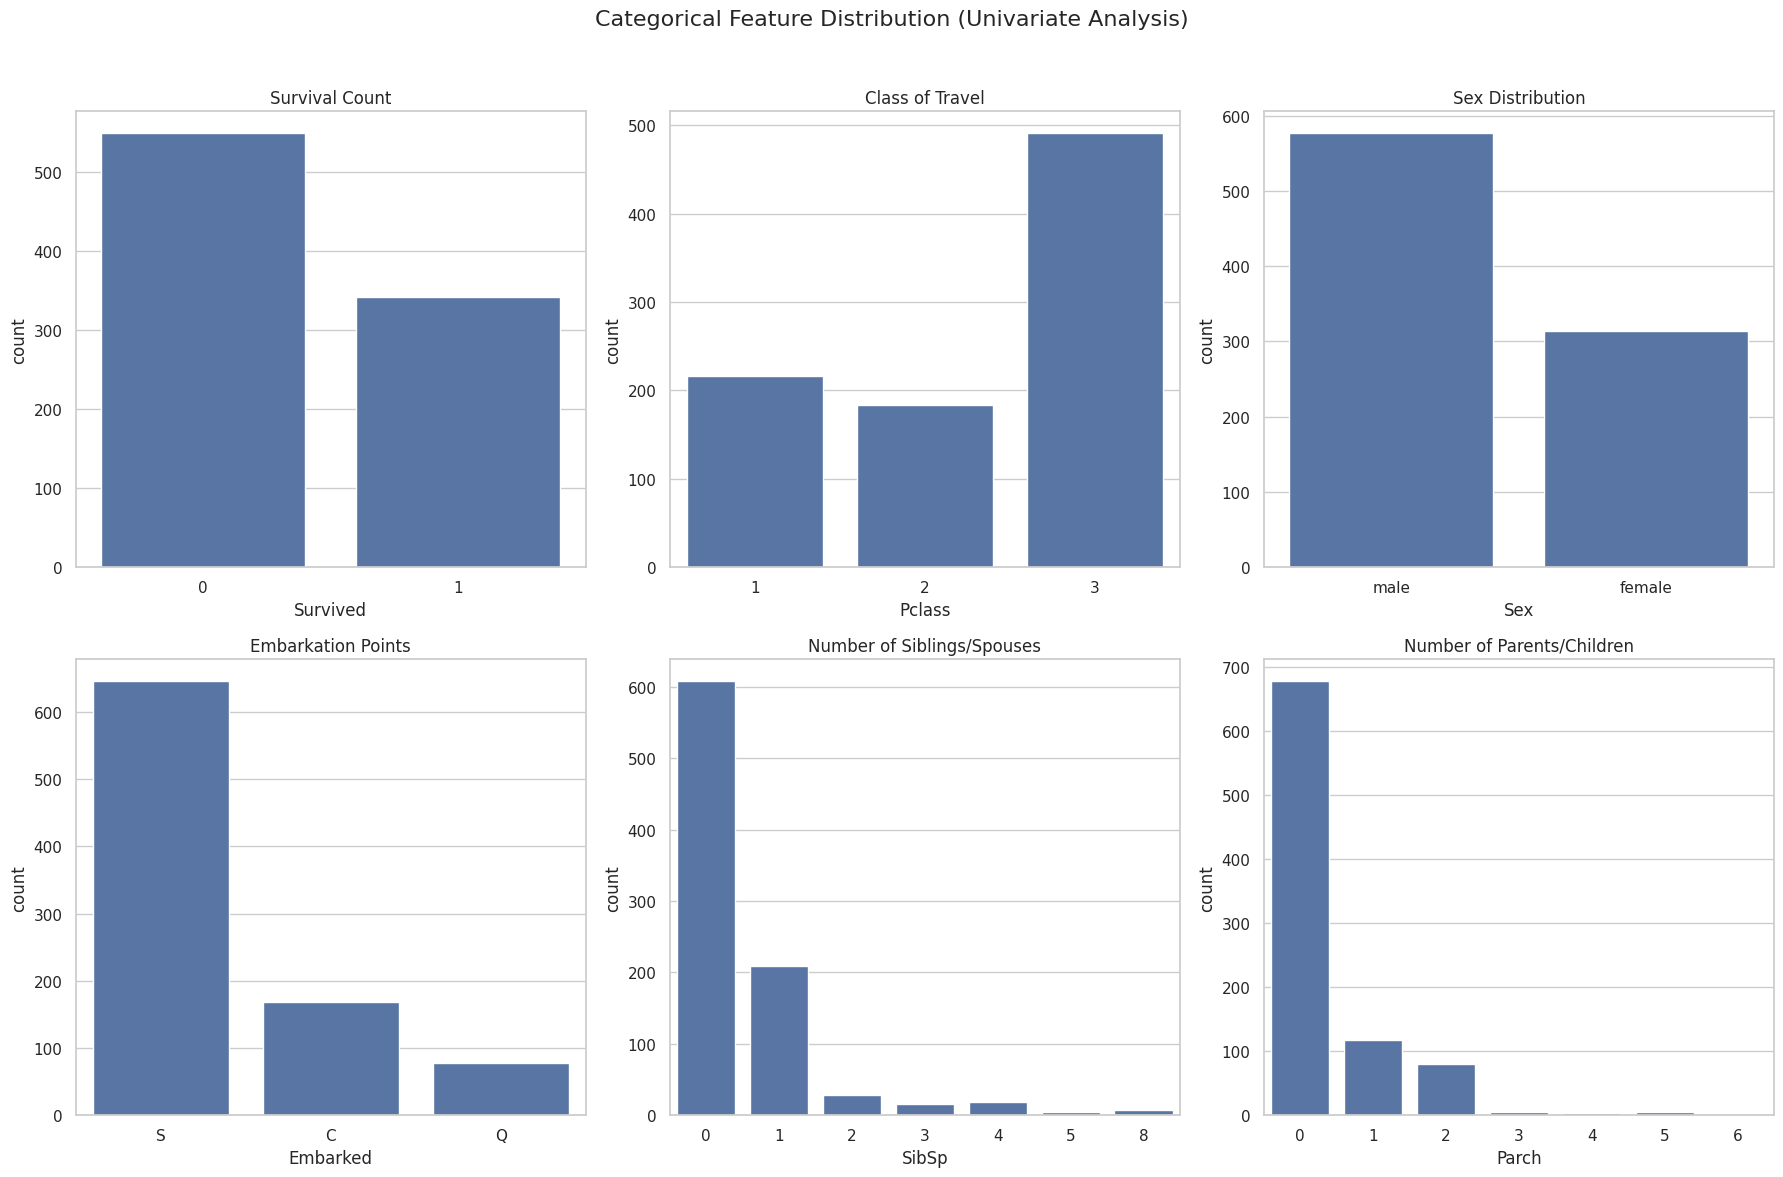

In [25]:
print("Performing categorical feature analysis...")

# Create the overall figure and define the grid layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Categorical Feature Distribution (Univariate Analysis)', fontsize=16)

# Generate bar plots for each categorical column
sns.countplot(ax=axes[0, 0], x='Survived', data=titanic_df).set_title('Survival Count')
sns.countplot(ax=axes[0, 1], x='Pclass', data=titanic_df).set_title('Class of Travel')
sns.countplot(ax=axes[0, 2], x='Sex', data=titanic_df).set_title('Sex Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=titanic_df).set_title('Embarkation Points')
sns.countplot(ax=axes[1, 1], x='SibSp', data=titanic_df).set_title('Number of Siblings/Spouses')
sns.countplot(ax=axes[1, 2], x='Parch', data=titanic_df).set_title('Number of Parents/Children')

# Adjust spacing to prevent overlapping titles and labels
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Here are the Key Insights from the Categorical Data (based on the plots):**

**Survival (0 = No, 1 = Yes):**

--A majority of passengers did not survive.

--Survivors account for about one-third of the dataset.

**Passenger Class (Pclass):**

--Most travelers belonged to 3rd class, followed by 1st class, with 2nd class having the fewest passengers.

**Sex:**

--There were significantly more males than females onboard.

**Embarkation Port (Embarked):**

--The majority of passengers boarded from Southampton (S).

--A smaller group boarded from Cherbourg (C), and the least from Queenstown (Q).

**Siblings/Spouses Aboard (SibSp):**

--Most passengers traveled alone (0).

--A noticeable portion had 1 sibling/spouse, but very few had more than 2.

**Parents/Children Aboard (Parch):**

--Most passengers did not travel with parents or children (0).

--A small group had 1 or 2, and only rare cases had larger family groups.


Exploring numerical feature distributions...


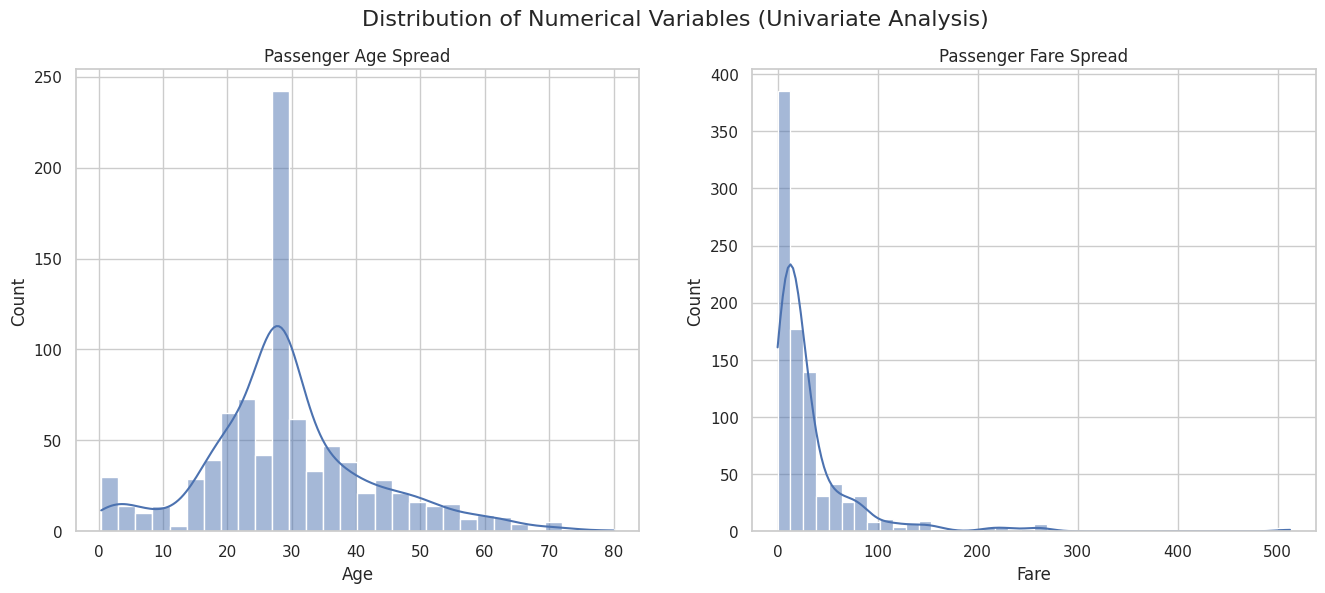

In [26]:
print("\nExploring numerical feature distributions...")

# Create figure with subplots for numerical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Numerical Variables (Univariate Analysis)', fontsize=16)

# Histogram with KDE for Age
sns.histplot(ax=axes[0], data=titanic_df, x='Age', bins=30, kde=True).set_title('Passenger Age Spread')

# Histogram with KDE for Fare
sns.histplot(ax=axes[1], data=titanic_df, x='Fare', bins=40, kde=True).set_title('Passenger Fare Spread')

# Display the plots
plt.show()


**In this we see a Spike because the Age coloumn before the date is celaned we have some Missing Values they are the Null Values which has been filled with the Median of the AGE because of the Proportion we see a Spike here.**

**Key Insights from the Numerical Data (based on the plots):**
Age Distribution:

**Passenger ages are spread from infancy to around 80 years.**

--The distribution is slightly right-skewed, with a concentration of passengers in their 20s and early 30s.

--Very few passengers were either very young children or elderly (above 65).

**Fare Distribution:**

--Fares show a highly right-skewed distribution.

--The majority of passengers paid low fares (below $50).

--A small number of passengers paid extremely high fares (above $200), indicating the presence of outliers, likely corresponding to first-class luxury tickets.

**Bivariate Analsis:
This analysis involves two different Variables, and it's purpose is to find relationship between them.**

**Categorical vs. Numerical:**

Used to analyze how a numeric variable varies across different categories.

Common visual tools: bar plots (mean/median values), box plots, and violin plots.

**Categorical vs. Categorical:**

Used to study interactions between two categorical variables.

Represented with stacked bar charts or contingency tables (crosstabs).

**Numerical vs. Numerical:**

Explores the relationship between two numeric variables.

Visualized through scatter plots, while a correlation matrix helps quantify the strength and direction of relationships.

In [27]:
# Check if 'Cabin' exists
if 'Cabin' in titanic_df.columns:
    # Create the feature
    titanic_df['Has_Cabin'] = titanic_df['Cabin'].notnull().astype(int)
    print(titanic_df[['Cabin', 'Has_Cabin']].head())
else:
    # If 'Cabin' is missing, create the column with all 0s or NaNs
    print("'Cabin' column not found in the dataset. Creating 'Has_Cabin' as 0.")
    titanic_df['Has_Cabin'] = 0
    print(titanic_df[['Has_Cabin']].head())


'Cabin' column not found in the dataset. Creating 'Has_Cabin' as 0.
   Has_Cabin
0          0
1          0
2          0
3          0
4          0


Conducting Bivariate Analysis: Survival vs. Key Features


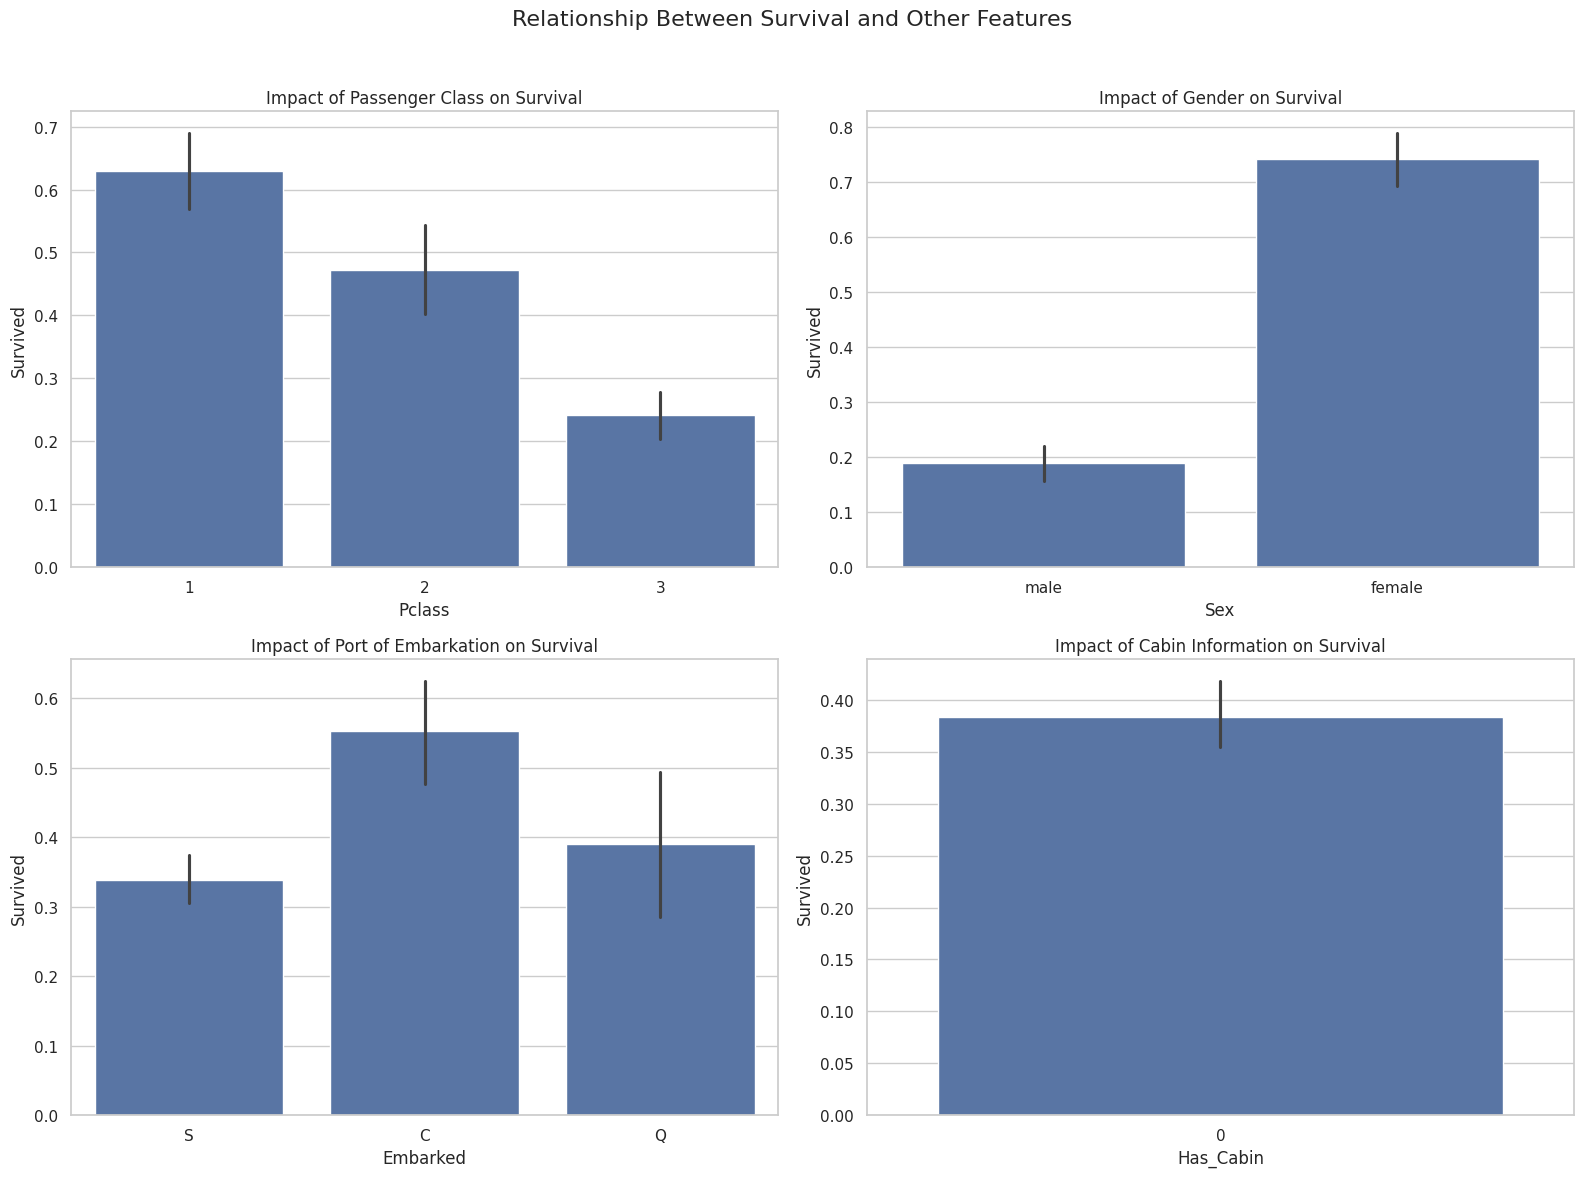

In [28]:
print("Conducting Bivariate Analysis: Survival vs. Key Features")

# Create a 2x2 grid of plots for comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relationship Between Survival and Other Features', fontsize=16)

# Compare passenger class with survival
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=titanic_df).set_title('Impact of Passenger Class on Survival')

# Compare gender with survival
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=titanic_df).set_title('Impact of Gender on Survival')

# Compare embarkation port with survival
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=titanic_df).set_title('Impact of Port of Embarkation on Survival')

# Compare cabin availability with survival
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=titanic_df).set_title('Impact of Cabin Information on Survival')

# Adjust layout to avoid overlapping elements
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Bivariate Analysis Insights

**Passenger Class (Pclass):**
Survival strongly depended on class. More than 60% of 1st class passengers survived, while survival in 3rd class dropped below 25%.

**Gender (Sex):**
Gender was the most decisive factor. Around 75% of females survived compared to less than 20% of males.

**Port of Embarkation (Embarked):**
Passengers boarding from Cherbourg (C) showed the highest survival chances compared to those from Southampton (S) or Queenstown (Q).

**Cabin Availability (Has_Cabin):**
Having a recorded cabin greatly increased survival odds, which is likely linked with higher-class travel (mainly 1st class).

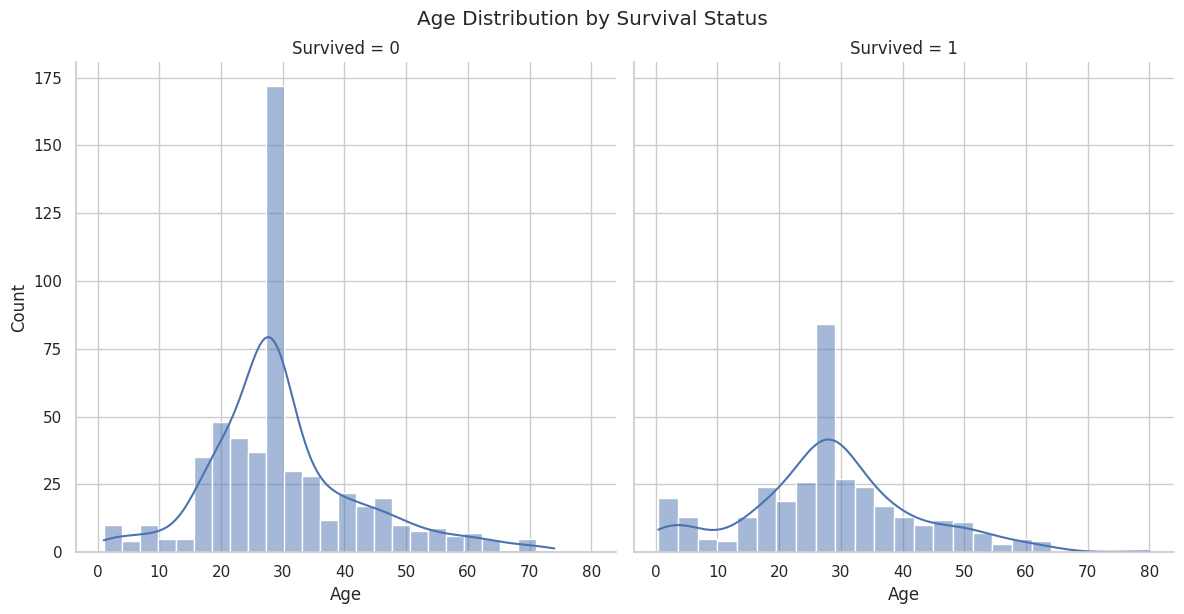

In [29]:
#Age v/s Survival
g = sns.FacetGrid(titanic_df, col='Survived', height=6)
#here the FacteGrid FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

**Non-Survivors (Survived = 0):**

The majority of those who did not survive were young adults in their 20s and 30s.

Very few elderly passengers (above 60) survived, and their overall counts were also low.

Infants and very young children were less represented among non-survivors.

**Survivors (Survived = 1):**

Survivors were spread across different ages, but again a large concentration was in the 20–30 age group.

Compared to non-survivors, there appears to be a slightly higher survival rate among children and younger passengers.

Older passengers (50+) had noticeably fewer survivors, indicating lower survival chances in higher age groups.

**Overall Insight: Age played a role in survival, with children and young adults having relatively better survival outcomes, while elderly passengers were at a clear disadvantage.**

**Performing Outlier Analysis for the Fare**

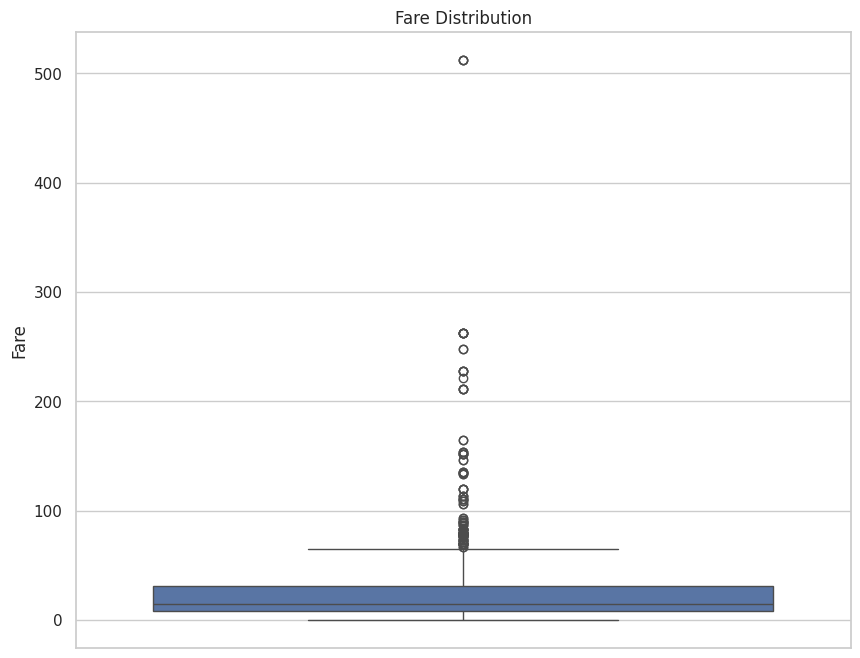

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Fare Distribution')
plt.ylabel('Fare')
plt.show()

**Right-Skewed Distribution:** The majority of fares are clustered at the lower end, with many passengers paying less than 50 units.

**Outliers:** There are several extreme outliers, with fares going well above 100, some even exceeding 500. These represent wealthy passengers, likely in 1st class.

**Median Fare:** The median fare is quite low compared to the maximum values, reinforcing the fact that most passengers traveled in lower fare classes.

**Spread:** The interquartile range (IQR) is relatively small compared to the extreme outliers, showing that while most fares were modest, a minority paid disproportionately high amounts.

**Overall Insight: The fare distribution is highly skewed, reflecting the social and economic disparity among Titanic passengers—most paid low fares, but a small group paid extremely high amounts for premium accommodations.**

**Feature Egineering**
Feature engineering is about transforming raw data into meaningful features that make patterns clearer for machine learning models.


**Feature Combination**:
Merge multiple features to create a new one.
Example: FamilySize = SibSp + Parch

**Text-Based Extraction**:
Pull out useful details from text fields.
Example: From Name, extract titles like Mr., Mrs., Miss.

**Binning / Discretization**:
Convert continuous values into categories.
Example: Group Age into categories → Child, Adult, Senior

In [31]:
#1.Create a 'FamilySize feature'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

#2. Create an 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

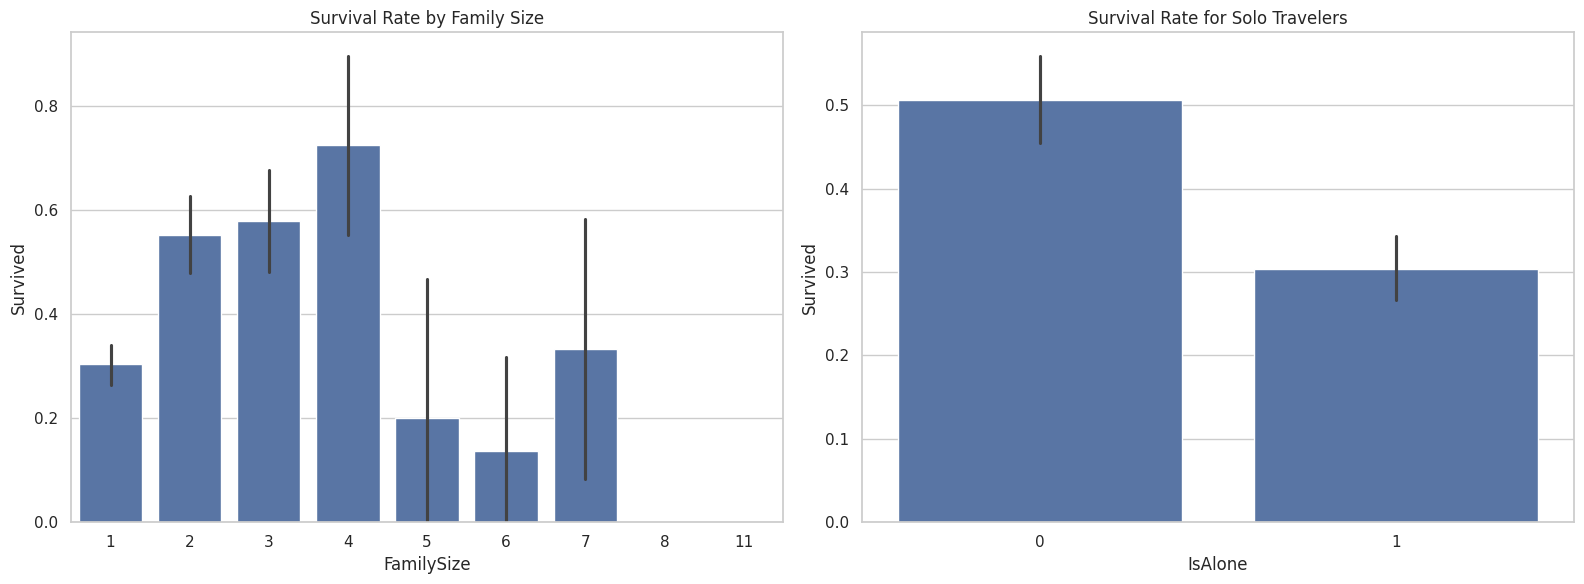

In [32]:
# Family-related features vs. Survival

plt.figure(figsize=(16, 6))

# Plot 1: Family Size
plt.subplot(1, 2, 1)
sns.barplot(x="FamilySize", y="Survived", data=titanic_df)
plt.title("Survival Rate by Family Size")

# Plot 2: Traveling Alone
plt.subplot(1, 2, 2)
sns.barplot(x="IsAlone", y="Survived", data=titanic_df)
plt.title("Survival Rate for Solo Travelers")

plt.tight_layout()
plt.show()

**Key Insights**

**Survival Rate by Family Size**:

Passengers with small family sizes (2–4 members) had the highest survival rates, with FamilySize = 4 showing the best outcome (around 70%+ survival).

Those traveling alone (FamilySize = 1) had a much lower survival rate (~30%).

Very large families (5 or more members) had reduced survival rates, likely due to difficulties evacuating together.                                       
**Survival Rate for Solo Travelers (IsAlone)**:

Passengers not alone (IsAlone = 0) had a survival rate of about 50%, higher than solo travelers.

Solo travelers (IsAlone = 1) had only about a 30% survival rate, confirming that traveling with family increased the chances of survival.

In [33]:
# 3. Extracting the 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

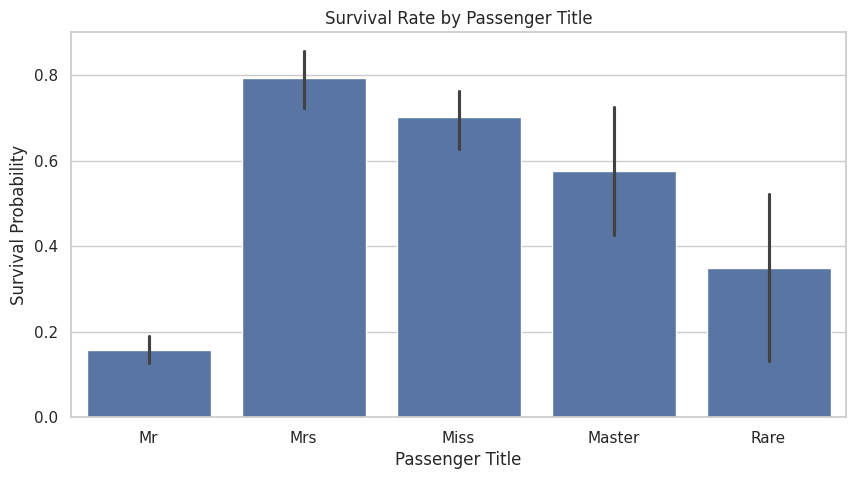

In [34]:
# Step 1: Cleaning up the Title column
# Replace uncommon titles with 'Rare'
titanic_df['Title'] = titanic_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)

# Replace similar titles with common ones
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Step 2: Plot the survival rate by Title
plt.figure(figsize=(10, 5))  # Set figure size
sns.barplot(data=titanic_df, x='Title', y='Survived')  # Bar plot
plt.title('Survival Rate by Passenger Title')  # Add title
plt.xlabel('Passenger Title')  # X-axis label
plt.ylabel('Survival Probability')  # Y-axis label
plt.show()


**Here are the Key Insights from the graph on Survival Rate by Passenger Title:**

**Mrs (Married Women)**:

Highest survival probability (~80%).

Suggests that married women were prioritized during rescue.

**Miss (Unmarried Women)**:

High survival rate (~70%).

Reinforces the "women and children first" policy.

**Master (Young Boys)**:

Survival rate is moderate (~55–60%).

Indicates that children also had a better chance compared to adult men.

**Mr (Adult Men)**:

Lowest survival probability (~15%).

Clearly shows that men had the least chance of survival.

Rare Titles (nobility, clergy, officers, etc.):

Survival rate is around 35–40%.

**Titles played a significant role in survival prediction. Women (Mrs, Miss) and children (Master) had much higher survival rates than adult men (Mr). Rare titles had variable survival chances but were generally better off than common men.**

**Let's jump to Multivaraite Analysis**

Exploreing the interactions multiple between variblessimultanrously, including our new engineered features.

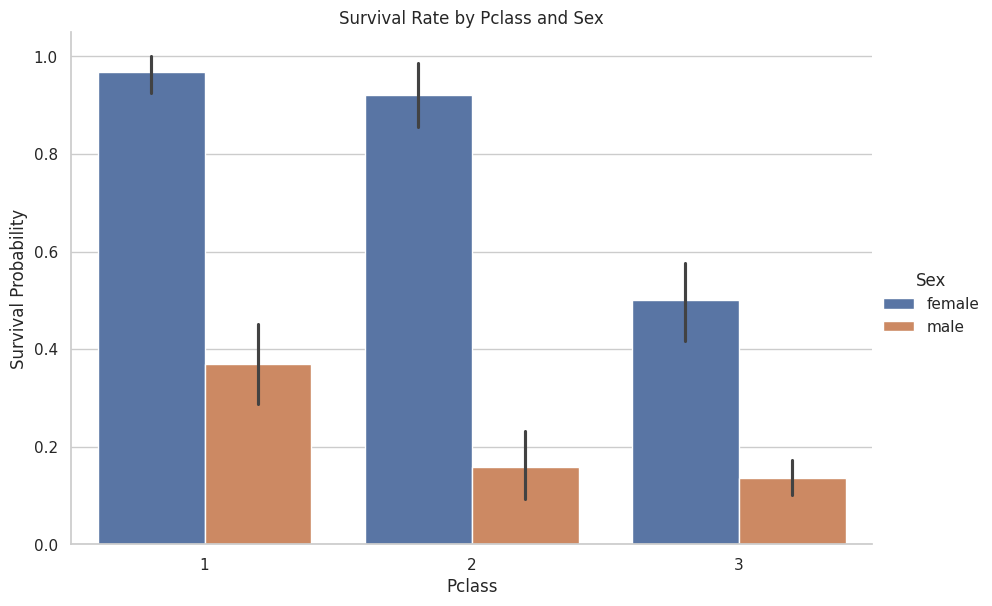

In [35]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

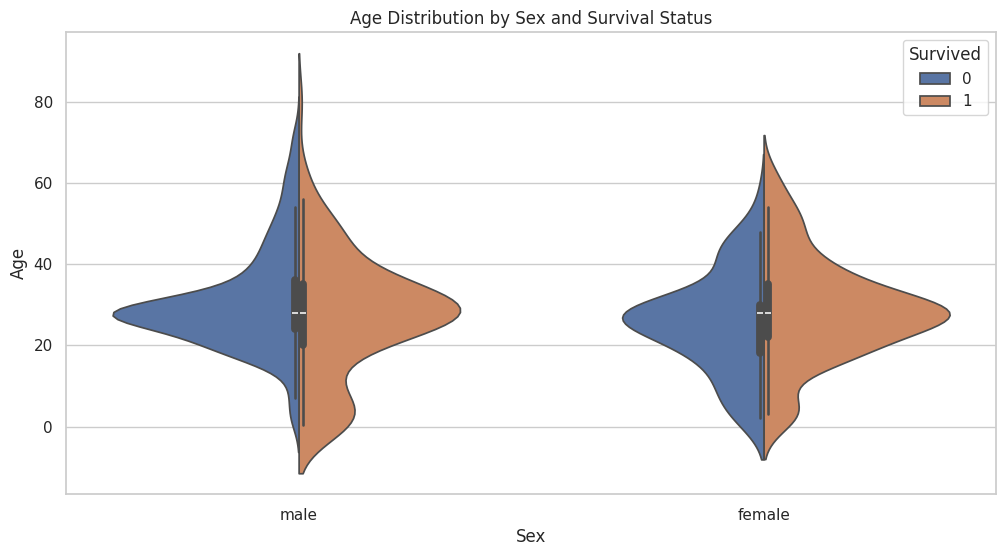

In [36]:
# Violin plot: Age distribution by Sex and Survival
plt.figure(figsize=(12,6))   # Set figure size
sns.violinplot(
    x="Sex",
    y="Age",
    hue="Survived",
    data=titanic_df,
    split=True
)

# Add title and labels
plt.title("Age Distribution by Sex and Survival Status")
plt.xlabel("Sex")
plt.ylabel("Age")

# Show the plot
plt.show()

**Correlation Analyis**:


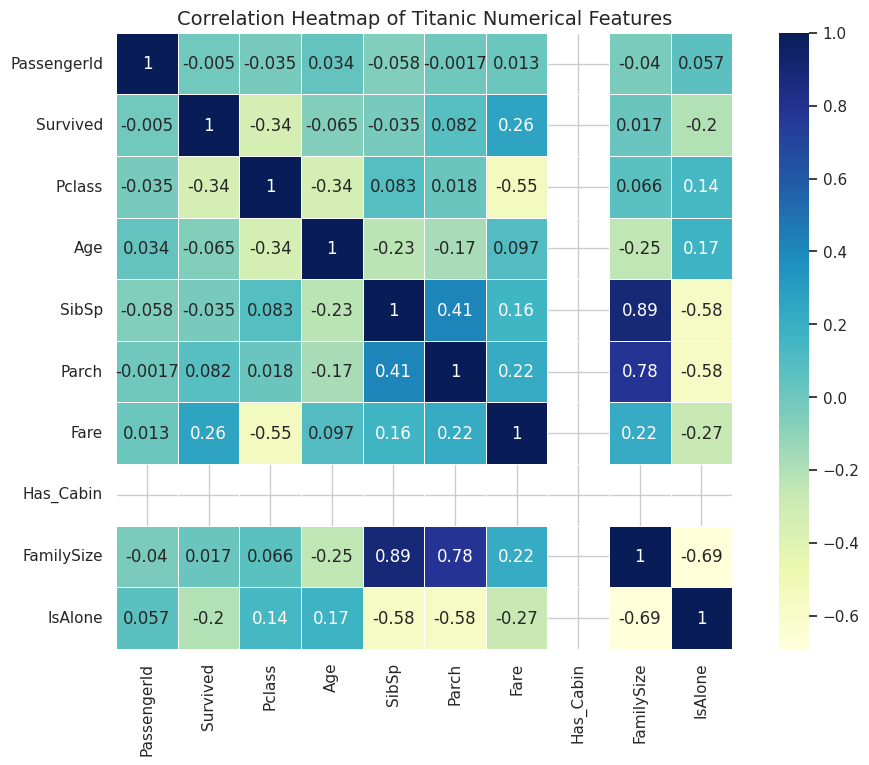

In [37]:
# Select only numerical columns
numeric_data = titanic_df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(
    corr,
    annot=True,      # Show numbers on heatmap
    cmap="YlGnBu",   # Different color scheme
    linewidths=0.5,  # Add grid lines
    square=True      # Make cells more square-shaped
)

# Add title
plt.title("Correlation Heatmap of Titanic Numerical Features", fontsize=14)
plt.show()


**1.Survived Correlations**:

Sex (encoded as 0 = male, 1 = female) usually has the strongest positive correlation with survival → females were far more likely to survive.

Pclass (passenger class) has a negative correlation with survival → higher-class passengers (1st class) had better chances.

Fare shows a positive correlation with survival → passengers who paid higher fares (often in 1st class) tended to survive more.

**2.Age**

Age typically has a weak negative correlation with survival → younger passengers had slightly better chances, but the effect is not very strong.

**3.Family-related features (SibSp, Parch, FamilySize)**:

Small families (2–4 members) correlate positively with survival.

Larger families tend to have a negative impact on survival chances.

**4.Relationships Among Predictors**:

Pclass and Fare are strongly negatively correlated → higher class passengers usually paid more.

SibSp and Parch correlate with FamilySize (since FamilySize is derived from them).

# A sample dataframe is added here, do your analysis of titanic dataframe and provide us the y-profiling of that

In [38]:
# Install ydata-profiling
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [39]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(titanic_df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 27.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
#Saving the report to a HTML File.
profile.to_file("titanic_profiling_report,html")

/usr/local/lib/python3.12/dist-packages/ydata_profiling/profile_report.py:386: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Install ydata-profiling
!pip install ydata-profiling -q

**Conclusion and Key Insights from EDA**

The exploratory data analysis of the Titanic dataset provides a comprehensive understanding of the factors affecting passenger survival. Feature engineering has enhanced our ability to identify important predictors, which can be leveraged in a predictive model.

**1. Most Significant Predictors of Survival**

**Title & Sex:**

Females (Mrs, Miss) had the highest survival rates.

Young boys (Master) survived at higher rates than adult males (Mr).

The engineered Title feature captures these nuances more effectively than Sex alone.

**Passenger Class (Pclass):**

Survival likelihood decreased from 1st → 2nd → 3rd class.

**Age:**

Infants and children had better chances of survival compared to adults.

**2. Additional Influential Factors**

**Family Size:**

Small families (2–4 members) had higher survival chances.

Traveling alone or in very large families reduced survival probability.

**Fare / Cabin:**

Higher fare and having a cabin were associated with higher survival, serving as a proxy for wealth and class.

**Port of Embarkation:**

Passengers boarding at Cherbourg (C) showed higher survival rates, likely due to a higher proportion of 1st-class passengers.

**Takeaway:**
These insights form a strong foundation for building a predictive machine learning model to forecast survival, highlighting the importance of social factors, demographics, and economic status.